# NEURON Tutorial 1
## Objectives
- Create a passive cell membrane in NEURON.
- Create a synaptic stimulus onto the neuron.
- Modify parameters of the membrane and stimulus.
- Visualize results with matplotlib.

## Step 1: Import the `neuron` module into Python

The primary scripting language of NEURON software is hoc, but a Python interface is also available. To install NEURON software in anaconda environment, simply run `pip install neuron` in your anaconda prompt, and the installation will complete in a few minites.

Like other non-Python's *built-in* functions, you need to import neuron module into your Python working environment.

```python
import neuron
print(neuron.__version__)
```
Here, we can use the code above to check the version of NEURON you installed.

There are only a limited number of functions avaiable directly from the neuron module. In practice, we usually want to directly import the submodules we need; i.e. do something like the below instead:

In [1]:
from neuron import h

When using NEURON, you will always want the h submodule. You may or may not need to import the additional submodules mentioned above.

NEURON assueds certain default units (concentration in mM, time in ms, voltage in mV), but units can be specified explicitly by importing unit definitions from neuron.units. Even if you are using the default units, being explicit makes your code more readable by others. For example:

In [2]:
from neuron.units import ms, mV 

If the above gives you an error, then you are using a version of NEURON older than 7.7. Update before proceeding.

## Step 2: Create a cell

A [Section](https://neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html#geometry) is the basic morphological building-block in NEURON. We typically think of a Section as an unbranched cable, but it can also be used to represent a soma. Thus a simple model neuron with only a soma can be created as in:

In [3]:
soma = h.Section(name='soma')

### Aside 1: NEURON's `h.topology` funcion

Use `h.topology` function to check the topological structure of sections that we create in the working space.

In [4]:
h.topology()


|-|       soma(0-1)



1.0

### Aside 2: The `psection` method

Use `Section.psection` function (namely, properties of the section) to check the detailed parameters of the morphology, biophysical mechanism, input information, and etc. The return type is Python built-in dictionary.

In [5]:
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x7ffd506a8000',
 'cell': None}

The results tell us the soma is a cylinder with length 100 microns, diameter 500 microns, axial resistivity 35.4 ohm*cm, and specific membrance capacitance 1 μF/cm2.

In [6]:
soma.psection()['morphology']['L']

100.0

In [7]:
soma.L

100.0

## Setp 3: Set the cell's morphological properties

In [8]:
soma.L = 20
soma.diam = 20

### Aside 3: Get more help

In [9]:
help(soma.connect)

Help on built-in function connect:

connect(...) method of nrn.Section instance
    childSection.connect(parentSection, [parentX], [childEnd]) or
    childSection.connect(parentSegment, [childEnd])



In [10]:
soma.connect?

## Step 4: Insert ion channels

NEURON comes with a few built in biophysical mechanisms taht can be added to a model:

| | |
|:--|:---|
|`pas`|Passive ("leaky") channel.|
|`extracellular`|For simulating effects of nonzero extracellular potential, as may happen with leaky patch clamps, or detailed propertes of the myelin sheath.|
|`hh`|Hodgkin-Huxley sodium, potassium, and leakage channels.|

In [11]:
soma.insert('hh')

soma

In [12]:
soma.psection()

{'point_processes': {},
 'density_mechs': {'hh': {'gnabar': [0.12],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x7ffd506a8000',
 'cell': None}

### Asides 4: Sections and segments
Using the Python type function can tell us what a variable is:
```python 
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) = {}".format(type(soma(0.5))))
```
type(soma) = <class 'nrn.Section'><br>
type(soma(0.5)) = <class 'nrn.Segment'>

In [13]:
mech = soma(0.25).hh
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'il', 'is_ion', 'm', 'n', 'name', 'segment']


In [14]:
print(mech.gkbar)
print(soma(0.5).hh.gkbar)

0.036
0.036


## Step 5: Insert a stimulus
- Type 1: Constant current, i.e., current clamp.

In [15]:
iclamp = h.IClamp(soma(0.5))

In [16]:
print([item for item in dir(iclamp) if not item.startswith('__')])

['amp', 'baseattr', 'delay', 'dur', 'get_loc', 'get_segment', 'has_loc', 'hname', 'hocobjptr', 'i', 'loc', 'same']


In [17]:
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9

In [18]:
soma.psection()

{'point_processes': {'IClamp': {IClamp[0]}},
 'density_mechs': {'hh': {'gnabar': [0.12],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x7ffd506a8000',
 'cell': None}

- Type 2: synaptic input

A [NetSim](https://neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#NetStim) is a spike generator that can be used as the source in a NetCon, behaving as external input onto the synapse of a target cell.

In [19]:
stim = h.NetStim() 
stim.number = 1
stim.start = 9

To generate random (Poisson-like) synaptic input, we can set `NetStim().noise` (fraction of randomness) and `NetStim().interval` (1 / mean firing rate).

```python
stim.noise = 1
stim.interval = 10*ms
```

The code below makes a stimulator and attaches it to a synapse object [ExpSyn](https://neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#ExpSyn) that behaves much like an AMPA synapse – it conducts current as a decaying exponential function.

In [20]:
syn_ = h.ExpSyn(soma(0.5))
ncstim= h.NetCon(stim, syn_)
ncstim.delay = 1*ms
ncstim.weight[0]=0.04
syn_.tau=2*ms
print('Reversal potential = {} mV'.format(syn_.e))

Reversal potential = 0.0 mV


## Step 6: Set up recording variables

In [21]:
v = h.Vector().record(soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

## Step 7: Run the simulation

In [22]:
h.load_file('stdrun.hoc')

1.0

In [23]:
h.finitialize(-65*mV)

1.0

In [24]:
h.continuerun(20*ms)

0.0

## Step 8: Plot the results

In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'v(mV)')

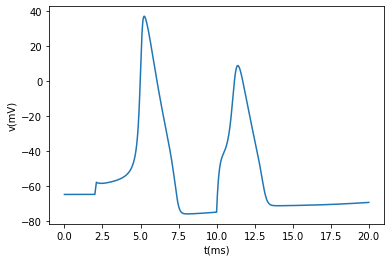

In [26]:
plt.figure()
plt.plot(t,v)
plt.xlabel('t(ms)')
plt.ylabel('v(mV)')


## Step 8: Saving and loading results

### Text-based format

#### CSV

In [27]:
import csv

**Writing**

In [28]:
with open('data.csv', 'w') as f:
  csv.writer(f).writerows(zip(t,v))

**Reading**

In [29]:
with open('data.csv', 'r') as f:
  reader = csv.reader(f)
  tnew, vnew = zip(*[[float(val) for val in row] for row in reader if row])

Text(0, 0.5, 'v(mV)')

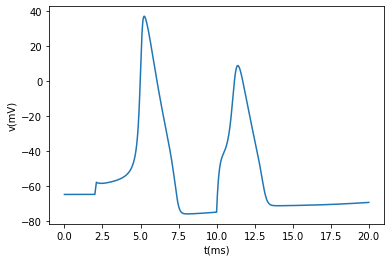

In [30]:
plt.figure()
plt.plot(tnew, vnew)
plt.xlabel('t(ms)')
plt.ylabel('v(mV)')

#### JSON

In [31]:
import json

**Writing**

In [32]:
with open('data.json', 'w') as f:
  json.dump({'t': list(t), 'v': list(v)}, f, indent=4)

**Reading**

In [33]:
with open('data.json') as f:
    data = json.load(f)
tnew = data['t']
vnew = data['v']

Text(0, 0.5, 'v (mV)')

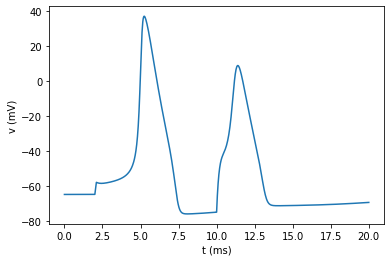

In [34]:
plt.figure()
plt.plot(tnew, vnew)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

### Binary format

#### Numpy binary format

In [35]:
import numpy as np

**Writing**

In [36]:
np.savez('data.npz', **{'t':np.array(t), 'v':np.array(v)})

**Reading**

In [37]:
data = np.load('data.npz')
tnewnpz = data['t']
vnewnpz = data['v']

Text(0, 0.5, 'v (mV)')

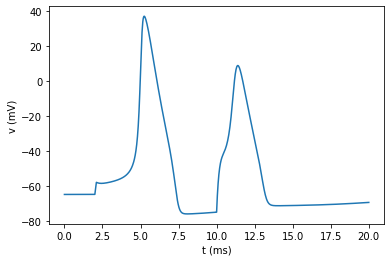

In [38]:
plt.figure()
plt.plot(tnewnpz, vnewnpz)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

#### Pickles

In [39]:
import pickle

**Writing**

In [40]:
with open('data.p', 'wb') as f:
  pickle.dump({'t':t, 'v':v}, f)

**Reading**

In [41]:
with open('data.p', 'rb') as f:
  data = pickle.load(f)
tnewp = data['t']
vnewp = data['v']

In [42]:
type(tnewp)

hoc.HocObject

In [43]:
tnewp.hname()

'Vector[2]'

In [44]:
type(tnew)

list

Text(0, 0.5, 'v (mV)')

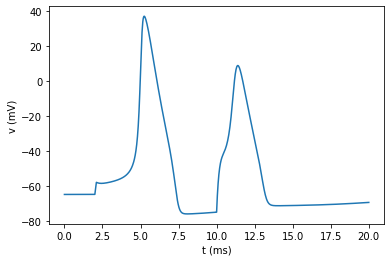

In [45]:
plt.figure()
plt.plot(tnew, vnew)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')